In [272]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [273]:
df = pd.read_csv('loan_data_v3.csv')

In [274]:
df.head()

,Unnamed: 0,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,4847,26.0,male,Associate,43996.0,4,RENT,5000.0,VENTURE,10.37,0.11,4.0,675.0,No,0.0
1,13802,22.0,female,Bachelor,115708.0,0,MORTGAGE,20000.0,EDUCATION,7.88,0.17,3.0,635.0,No,0.0
2,39763,25.0,female,High School,57827.0,0,RENT,6000.0,PERSONAL,11.60,0.10,4.0,589.0,Yes,0.0
3,39215,31.0,female,Master,126727.0,9,RENT,24000.0,DEBTCONSOLIDATION,10.27,0.19,7.0,644.0,Yes,0.0
4,26369,33.0,female,Associate,120987.0,10,OWN,25000.0,MEDICAL,12.18,0.21,10.0,644.0,Yes,0.0


In [275]:
df.columns

Index(['Unnamed: 0', 'person_age', 'person_gender', 'person_education',
       'person_income', 'person_emp_exp', 'person_home_ownership', 'loan_amnt',
       'loan_intent', 'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length', 'credit_score',
       'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [276]:
len(df) == len(df['Unnamed: 0'].unique())

True

In [277]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [278]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,26.0,male,Associate,43996.0,4,RENT,5000.0,VENTURE,10.37,0.11,4.0,675.0,No,0.0
1,22.0,female,Bachelor,115708.0,0,MORTGAGE,20000.0,EDUCATION,7.88,0.17,3.0,635.0,No,0.0
2,25.0,female,High School,57827.0,0,RENT,6000.0,PERSONAL,11.60,0.10,4.0,589.0,Yes,0.0
3,31.0,female,Master,126727.0,9,RENT,24000.0,DEBTCONSOLIDATION,10.27,0.19,7.0,644.0,Yes,0.0
4,33.0,female,Associate,120987.0,10,OWN,25000.0,MEDICAL,12.18,0.21,10.0,644.0,Yes,0.0


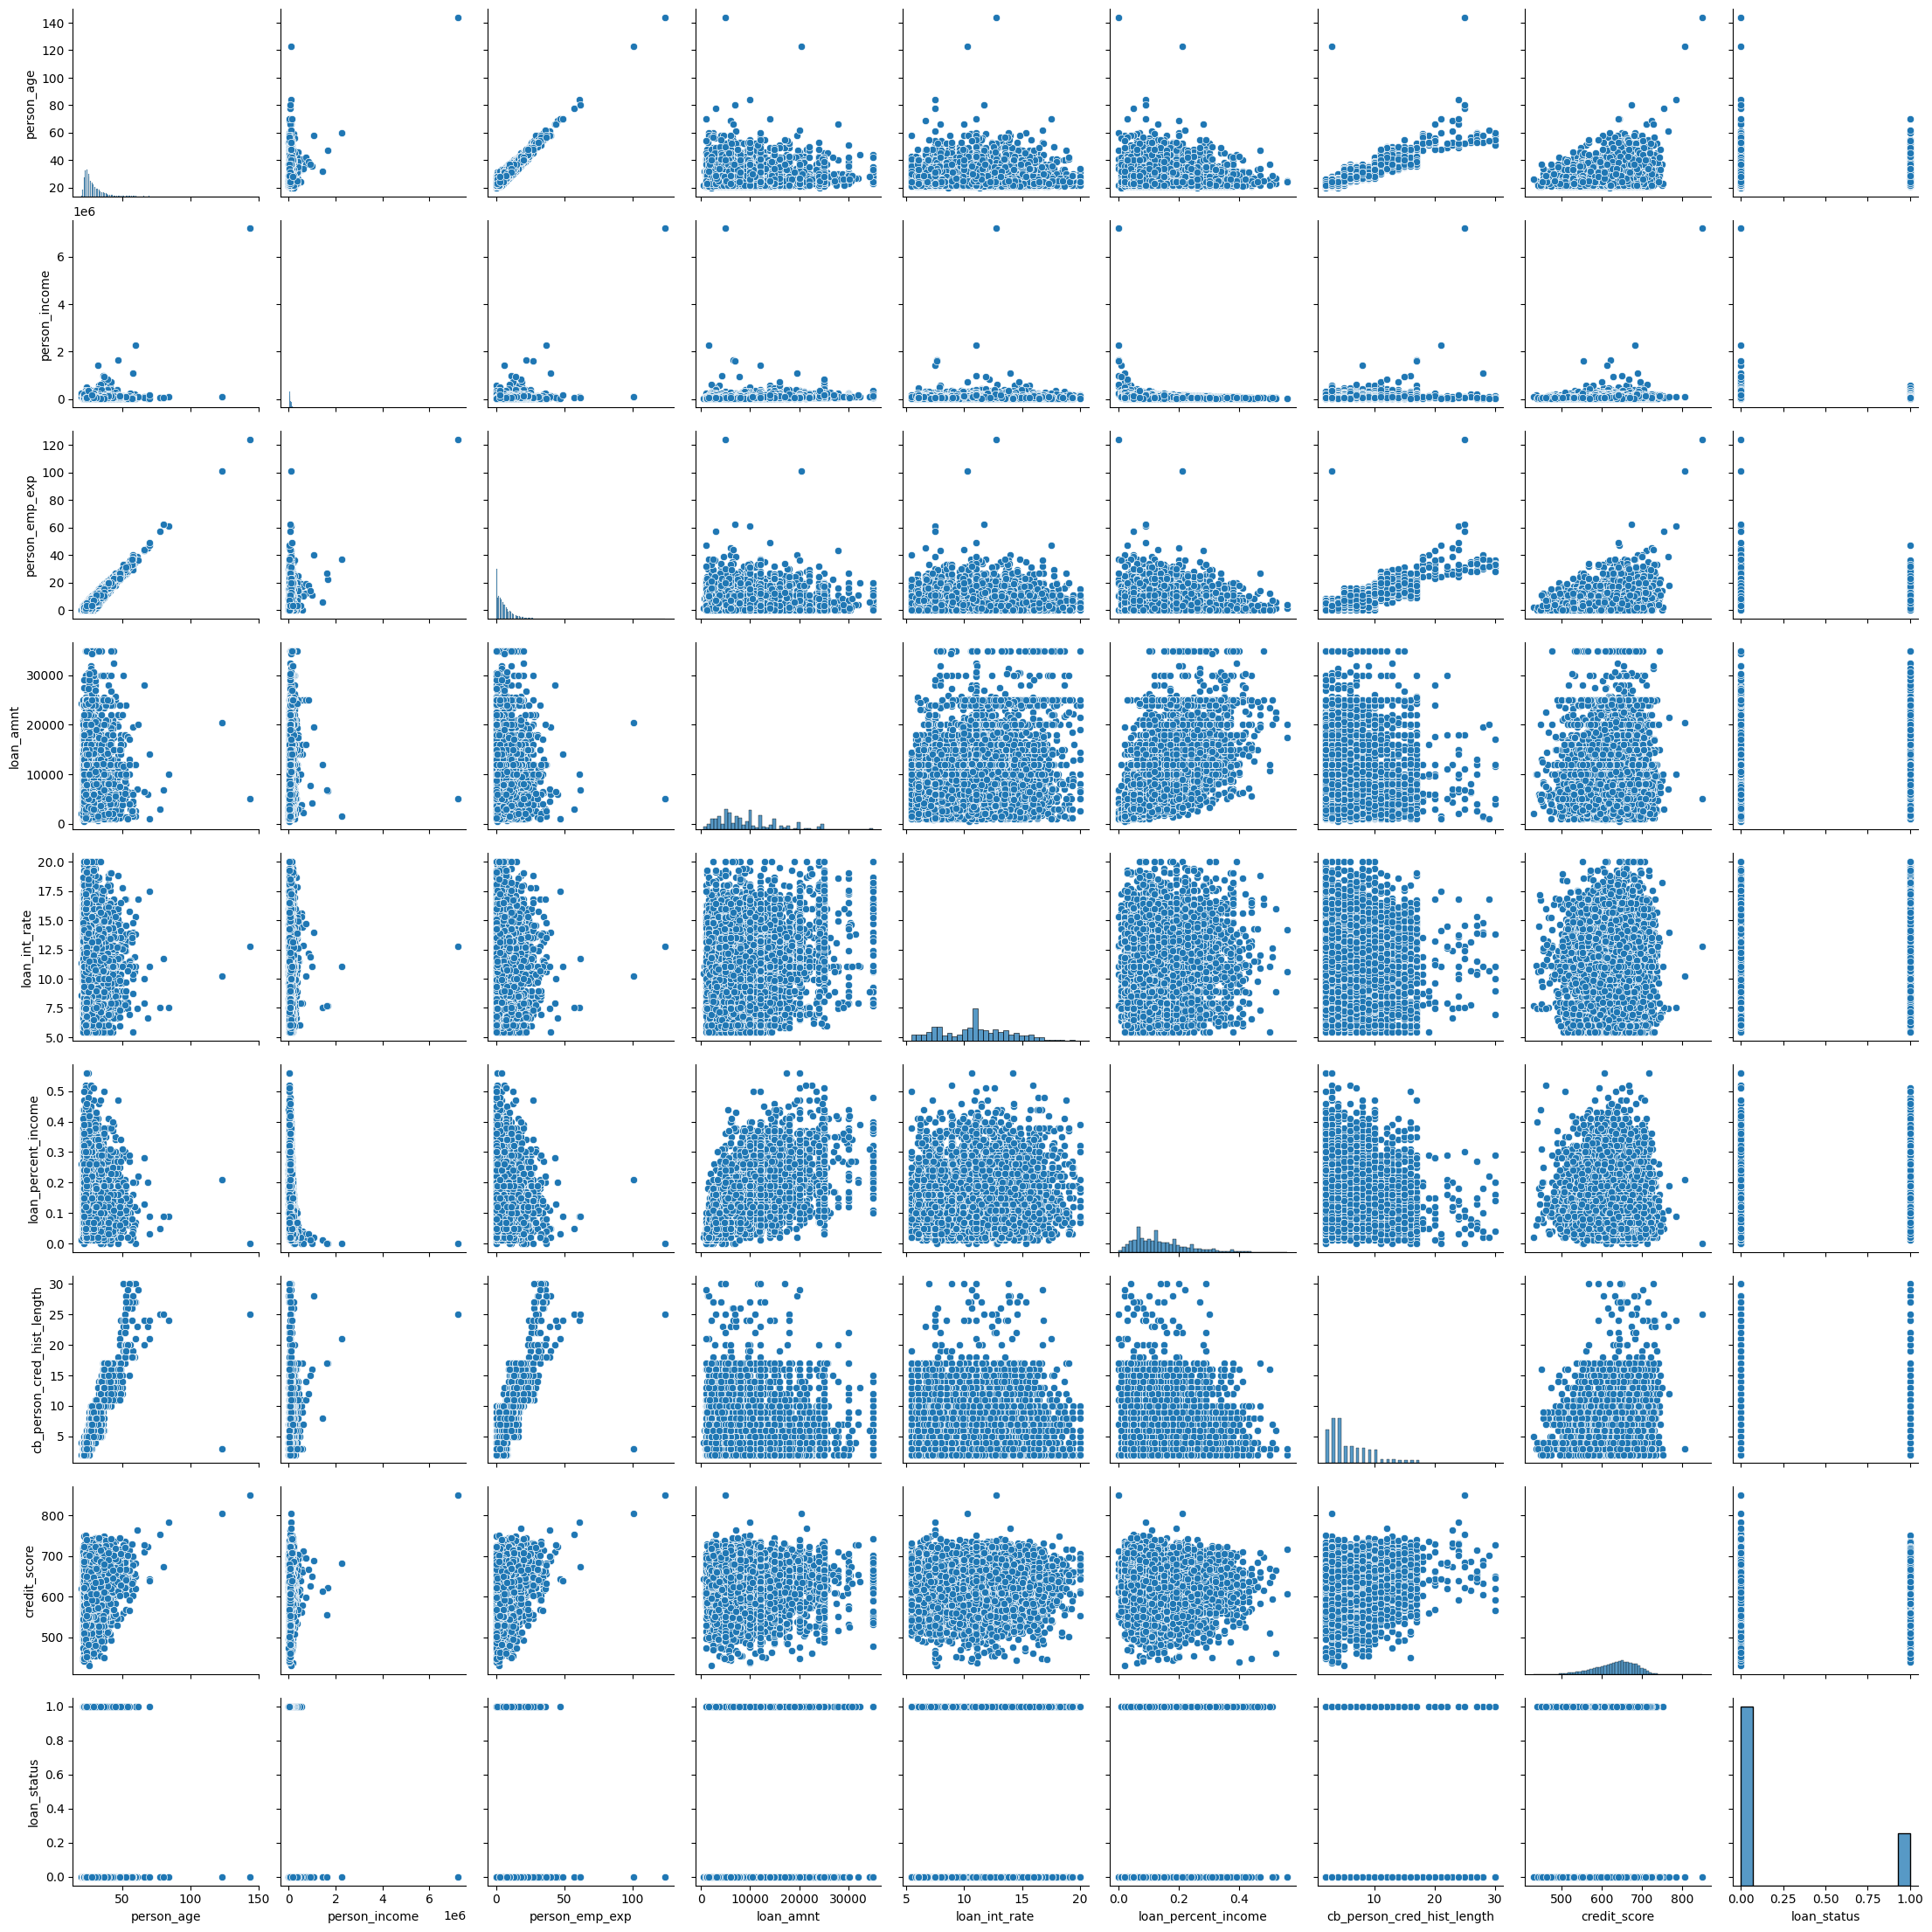

In [279]:
sns.pairplot(df)  
plt.show()

<Axes: xlabel='loan_status'>

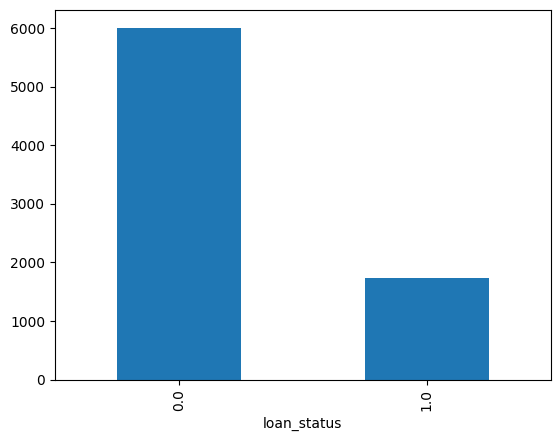

In [280]:
df["loan_status"].value_counts().plot.bar()

In [281]:
df.isnull().sum()

person_age                        488
person_gender                     294
person_education                  422
person_income                       0
person_emp_exp                      0
person_home_ownership               0
loan_amnt                         336
loan_intent                         0
loan_int_rate                       0
loan_percent_income                 0
cb_person_cred_hist_length          0
credit_score                      522
previous_loan_defaults_on_file      0
loan_status                       250
dtype: int64

<Axes: >

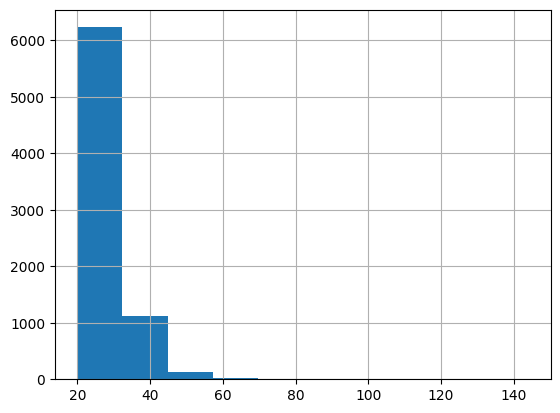

In [282]:
df['person_age'].hist()

In [283]:
df['person_age'].mean(), df['person_age'].median()

(np.float64(27.854632587859424), np.float64(26.0))

In [284]:
df['person_age'] = df['person_age'].fillna(df['person_age'].mean())

<Axes: xlabel='person_gender'>

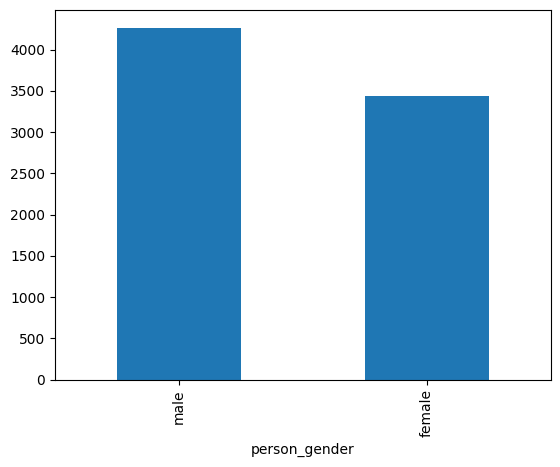

In [285]:
df['person_gender'].value_counts().plot.bar()

In [286]:
df['person_gender'] = df['person_gender'].map({'male': 0, 'female': 1})

<Axes: xlabel='person_education'>

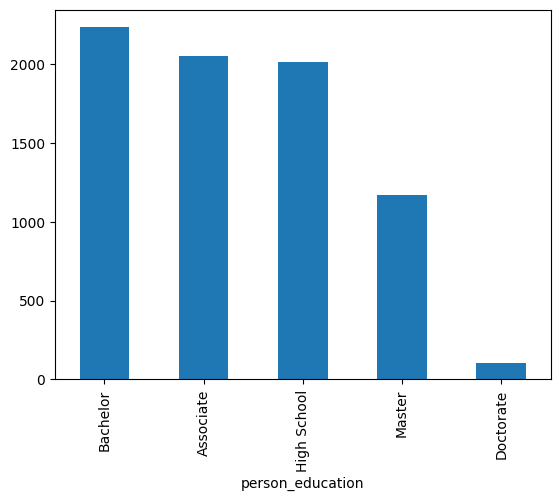

In [287]:
df['person_education'].value_counts().plot.bar()

In [288]:
education_order = ["High School", "Associate", "Bachelor", "Master", "Doctorate", np.nan]
encoder = OrdinalEncoder(categories=[education_order])
df[['person_education']] = encoder.fit_transform(df[['person_education']])

<Axes: >

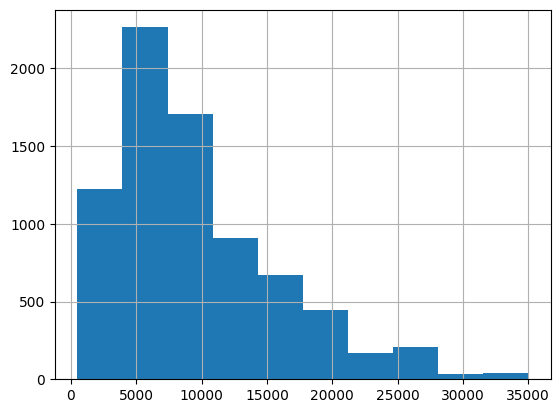

In [289]:
df['loan_amnt'].hist()

In [290]:
df['loan_amnt'] = df['loan_amnt'].fillna(df['person_age'].median())

<Axes: >

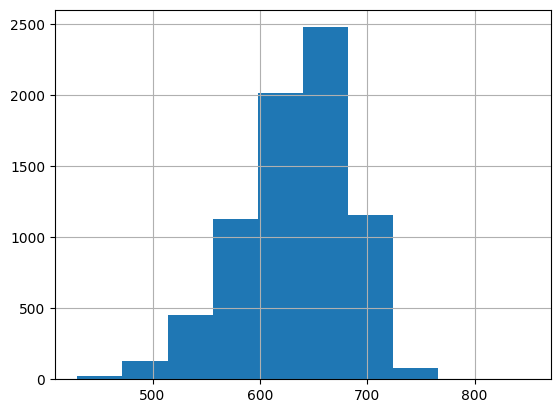

In [291]:
df['credit_score'].hist()

In [292]:
df['credit_score'] = df['credit_score'].fillna(df['credit_score'].mean())

In [293]:
df = df.dropna(subset=['loan_status'])

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7750 entries, 0 to 7999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      7750 non-null   float64
 1   person_gender                   7461 non-null   float64
 2   person_education                7341 non-null   float64
 3   person_income                   7750 non-null   float64
 4   person_emp_exp                  7750 non-null   int64  
 5   person_home_ownership           7750 non-null   object 
 6   loan_amnt                       7750 non-null   float64
 7   loan_intent                     7750 non-null   object 
 8   loan_int_rate                   7750 non-null   float64
 9   loan_percent_income             7750 non-null   float64
 10  cb_person_cred_hist_length      7750 non-null   float64
 11  credit_score                    7750 non-null   float64
 12  previous_loan_defaults_on_file  7750 no

In [295]:
df['person_home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER'], dtype=object)

In [296]:
encoder = OrdinalEncoder(categories=[['RENT', 'OTHER', 'OWN', 'MORTGAGE']])
df[['person_home_ownership']] = encoder.fit_transform(df[['person_home_ownership']])

In [297]:
df['loan_intent'].unique()

array(['VENTURE', 'EDUCATION', 'PERSONAL', 'DEBTCONSOLIDATION', 'MEDICAL',
       'HOMEIMPROVEMENT'], dtype=object)

In [298]:
loan_intents = pd.get_dummies(df['loan_intent'], prefix='loan_intent')
df = pd.concat([df, loan_intents], axis=1)
df.drop(columns=['loan_intent'], inplace=True)

In [299]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,26.0,0.0,1.0,43996.0,4,0.0,5000.0,10.37,0.11,4.0,675.0,No,0.0,False,False,False,False,False,True
1,22.0,1.0,2.0,115708.0,0,3.0,20000.0,7.88,0.17,3.0,635.0,No,0.0,False,True,False,False,False,False
2,25.0,1.0,0.0,57827.0,0,0.0,6000.0,11.60,0.10,4.0,589.0,Yes,0.0,False,False,False,False,True,False
3,31.0,1.0,3.0,126727.0,9,0.0,24000.0,10.27,0.19,7.0,644.0,Yes,0.0,True,False,False,False,False,False
4,33.0,1.0,1.0,120987.0,10,2.0,25000.0,12.18,0.21,10.0,644.0,Yes,0.0,False,False,False,True,False,False


In [300]:
df['previous_loan_defaults_on_file'].unique()

array(['No', 'Yes'], dtype=object)

In [301]:
df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].map({'No': 0, 'Yes': 1})

<Axes: >

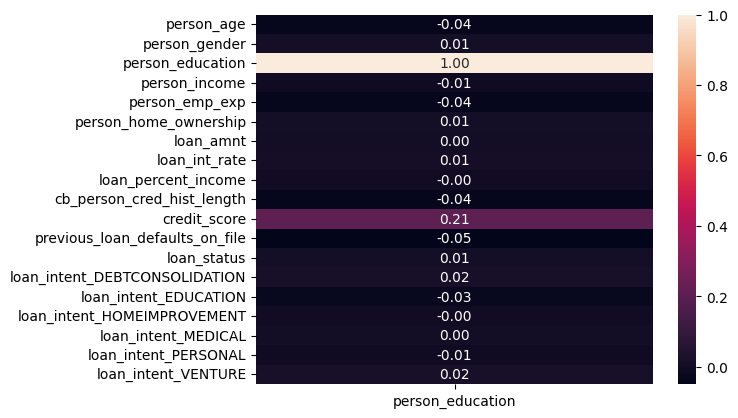

In [302]:
sns.heatmap(df.corr()[['person_education']], annot=True, fmt='.2f')

<Axes: >

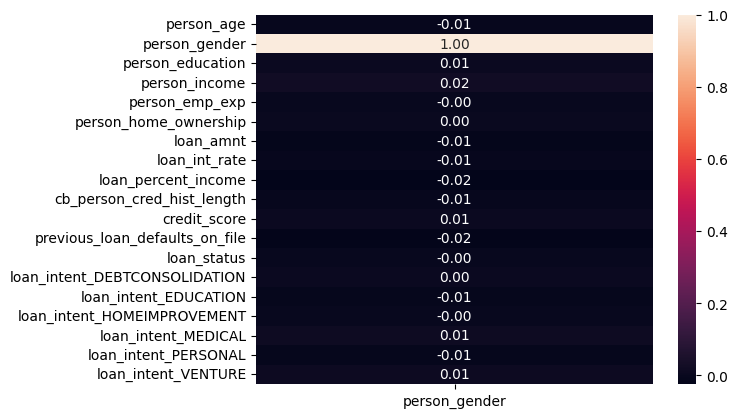

In [303]:
sns.heatmap(df.corr()[['person_gender']], annot=True, fmt='.2f')

In [304]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)

In [305]:
scaled

array([[0.0483871 , 0.        , 0.25      , ..., 0.        , 0.        ,
        1.        ],
       [0.01612903, 1.        , 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.04032258, 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.07258065, 1.        , 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.03225806, 1.        ,        nan, ..., 1.        , 0.        ,
        0.        ],
       [0.06451613, 1.        , 0.25      , ..., 0.        , 0.        ,
        0.        ]])

In [306]:
imputer = KNNImputer(n_neighbors=3)
imputed = imputer.fit_transform(scaled)

In [307]:
df = pd.DataFrame(scaler.inverse_transform(imputed), columns=df.columns)

In [308]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,26.0,0.0,1.0,43996.0,4.0,0.0,5000.0,10.37,0.11,4.0,675.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,22.0,1.0,2.0,115708.0,0.0,3.0,20000.0,7.88,0.17,3.0,635.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,25.0,1.0,0.0,57827.0,0.0,0.0,6000.0,11.60,0.10,4.0,589.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,31.0,1.0,3.0,126727.0,9.0,0.0,24000.0,10.27,0.19,7.0,644.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,33.0,1.0,1.0,120987.0,10.0,2.0,25000.0,12.18,0.21,10.0,644.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [309]:
df['person_education'].unique()

array([1.        , 2.        , 0.        , 3.        , 1.66666667,
       1.33333333, 4.        , 0.33333333, 2.33333333, 2.66666667,
       0.66666667])

In [310]:
df['person_gender'].unique()

array([0.        , 1.        , 0.33333333, 0.66666667])

In [311]:
df['person_education'] = df['person_education'].astype(int)
df['person_gender'] = df['person_gender'].astype(int)

In [312]:
X, y = df.drop(columns=["loan_status"]), df["loan_status"]

In [313]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)

In [314]:
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [315]:
classifier = LogisticRegression().fit(train_X, train_y)

In [316]:
pred_y = classifier.predict(test_X)

In [317]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

         0.0       0.92      0.93      0.92      1176
         1.0       0.77      0.73      0.75       374

    accuracy                           0.88      1550
   macro avg       0.84      0.83      0.84      1550
weighted avg       0.88      0.88      0.88      1550



In [318]:
classifier = DecisionTreeClassifier().fit(train_X, train_y)

In [319]:
param_grid = {
    "criterion": ["entropy", "gini"],
    "max_depth": [None, 1, 2, 3, 4],
}

In [320]:
grid_search = GridSearchCV(
    classifier,
    param_grid,
    scoring="f1_weighted",
    cv=5,
)

In [321]:
grid_search.fit(train_X, train_y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [None, 1, 2, 3, 4]},
             scoring='f1_weighted')

In [322]:
pred_y = grid_search.predict(test_X)

In [323]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

         0.0       0.91      0.96      0.94      1176
         1.0       0.85      0.72      0.78       374

    accuracy                           0.90      1550
   macro avg       0.88      0.84      0.86      1550
weighted avg       0.90      0.90      0.90      1550

